In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import network as net
from mnist_loader import load_mnist_data

In [3]:
train, valid, test = load_mnist_data()

In [4]:
def hyper_param_setting(training_data, valid_data, random_state, net_architecture, **sgd_params):
    main_param = {}
    for key, value in sgd_params.items():
        if (type(value) is list) or \
           (type(value) is np.ndarray):
           sgd_params.pop(key)
           main_param.update({key:value})
           print(f"Training by: {key}\n" + 16*"-")
           break

    recreate_sgd_params = [{**sgd_params, key:value} for value in \
        list(main_param.values())[0]]

    results = []
    nets = []
    for params in recreate_sgd_params:
        nn = net.Network(net_architecture, random_state=random_state)
        res = nn.SGD(training_data=training_data, evaluation_data=valid_data, **params)
        results.append(res)
        nets.append(nn)

    param = list(main_param.items())[0]

    return results, param, nets

In [5]:
def comparing_hyper_params(hyper_param, accuracy_and_cost_results, figsize=(10, 5)):
    hp = hyper_param[0]
    values = hyper_param[1]
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(figsize)
    for acc, cf in accuracy_and_cost_results:
        ax1.plot(acc)
        ax2.plot(cf)

    for ax in (ax1, ax2):
        ax.spines["right"].set_visible(False)    
        ax.spines["top"].set_visible(False)
        ax.tick_params(bottom=False, left=False)
        ax.legend([f"{hp}={value}" for value in values])
        
    ax1.set_title("Accuracy")
    ax2.set_title("Mean cost function")

    plt.show()

Training by: eta
----------------
Epoch 1 training complete
 evaluation data
    | Accuracy: 93.414286 

Epoch 2 training complete
 evaluation data
    | Accuracy: 93.735714 

Epoch 3 training complete
 evaluation data
    | Accuracy: 94.300000 

Epoch 4 training complete
 evaluation data
    | Accuracy: 94.878571 

Epoch 5 training complete
 evaluation data
    | Accuracy: 94.778571 

Epoch 1 training complete
 evaluation data
    | Accuracy: 93.464286 

Epoch 2 training complete
 evaluation data
    | Accuracy: 94.278571 

Epoch 3 training complete
 evaluation data
    | Accuracy: 94.957143 

Epoch 4 training complete
 evaluation data
    | Accuracy: 95.000000 

Epoch 5 training complete
 evaluation data
    | Accuracy: 94.935714 



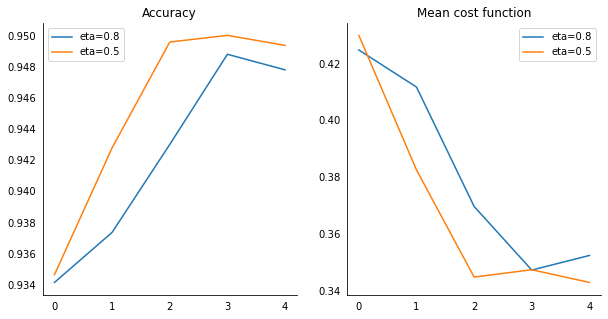

In [20]:
res = hyper_param_setting(
    training_data=train, 
    valid_data=valid, 
    random_state=None,
    net_architecture=[784, 30, 10],

    # SGD params 
    eta=[0.8, 0.5], 
    mini_batch_size=10, 
    lmbda=0.0, 
    epochs=5,
    n_epoch=None,
    monitor_evaluation_accuracy=True,
    monitor_learning_rate=True, 
    )
comparing_hyper_params(res[1], res[0])

In [17]:
n = np.array(res[0])[:, 0].max(axis=1).argmax()
res[1][1][n]

0.8

In [5]:
{"da":True}.get("net", False)

False

In [8]:
{"da":True}.pop("dneg")

KeyError: 'dneg'